# Code Demonstration  

In [15]:
# Import necessary libraries   
from sklearn import datasets, svm, metrics   
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler   
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset   
iris = datasets.load_iris()   
X = iris.data  # Features   
y = iris.target  # Labels 
# Split the data into training and testing sets   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Standardize the features   
scaler = StandardScaler()   
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
# Train SVM models with different kernels   
kernels = ['linear', 'poly', 'rbf']   
for kernel in kernels:   
    # Initialize the SVM classifier   
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale')   
    # Train the model   
    clf.fit(X_train, y_train)   
    # Make predictions   
    y_pred = clf.predict(X_test)   
    # Calculate and print accuracy   
    accuracy = metrics.accuracy_score(y_test, y_pred)   
    print(f"{kernel.capitalize()} Kernel - Test Accuracy: {accuracy:.2f}")

Linear Kernel - Test Accuracy: 0.97
Poly Kernel - Test Accuracy: 0.97
Rbf Kernel - Test Accuracy: 1.00


**Decision Boundary Visualization**

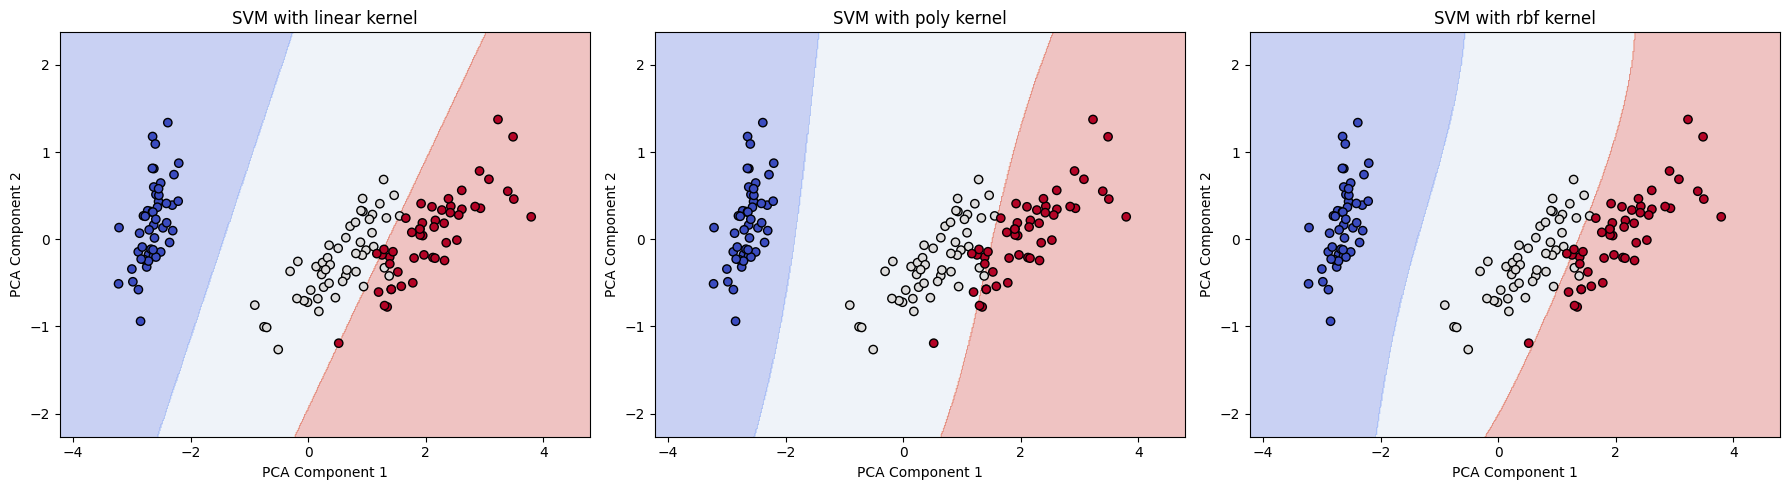

In [11]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define the SVM kernels to visualize
kernels = ['linear', 'poly', 'rbf']
models = {}

# Train models with each kernel
for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3)
    else:
        model = SVC(kernel=kernel)
    model.fit(X_pca, y)
    models[kernel] = model

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, kernel in zip(axes, kernels):
    model = models[kernel]
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

**Performance Comparison Across Kernels**

In [16]:
# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=1, stratify=y)

# Define kernels to test
kernels = ['linear', 'poly', 'rbf']

# Evaluate each SVM kernel
for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3)
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"\nSVM with {kernel} kernel")
    print(f"Training Accuracy: {train_acc * 100:.1f}%")
    print(f"Testing Accuracy: {test_acc * 100:.1f}%")



SVM with linear kernel
Training Accuracy: 96.2%
Testing Accuracy: 95.6%

SVM with poly kernel
Training Accuracy: 95.2%
Testing Accuracy: 88.9%

SVM with rbf kernel
Training Accuracy: 95.2%
Testing Accuracy: 95.6%
